In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True)
pd.set_option('display.float_format',lambda x : '%.20f' % x)
pd.set_option('display.max_columns', None)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [56]:
df = pd.read_csv("../dataset/train.csv")
df

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.82002337205149444799,-99.00000000000000000000,41.72301901002243340599,-0.90342290299641159201,82.41057318863289538058,42.52301541748178692615,2563.12452227166704687988,76.66555995046422822270,103402.96187187572650145739,26.89787489401040687653,NaN,239.83638750521930660398,2730.31060463211269961903,42.08466579565806853225,BA,Medium,2.21754164269036069257,0.31406483544967150889,24.28168893617015200448,6.76652069473684303347
1,WM_698,2018-11-05 10:13:20,241.83273424332921308633,27.76478479112672914653,-99.00000000000000000000,-99.00000000000000000000,44.10491890863708874804,46.25887000379637470360,2372.38411894775981636485,78.12980274280930359510,17030.90407797775333165191,39.80146882708524458394,NaN,337.94472273324237221459,1780.20719959988082337077,107.88864300855439637417,A2,Medium,4.21034630125676301304,0.44849442281167078983,27.26213869532712763544,5.96627480999999981748
2,WM_39146,2019-09-14 14:03:20,95.48472431680220040562,NaN,41.85547318972749053501,12.65276347555559155467,42.32209842785778164398,42.87855166354412261853,1657.16964619576901895925,67.65446853043140151840,16125.92710723713571496774,36.11606465409759891827,45.03319674848240339315,227.85029392100651080000,1666.04989997854249850207,-42.93145891998506158416,ABC,Medium,2.71947497531688497929,0.30232099622293528984,27.36612717682671913622,2.87434196842105338376
3,WM_6757,2018-12-25 15:33:20,238.81942418939200933892,-99.00000000000000000000,45.44391422559145610194,15.11532282403330640363,44.75964250989849801954,47.28210075871683670812,2888.13407902989274589345,95.38997435471027586118,18689.73233594912016997114,46.02004545397852552924,44.82715436890128302139,492.08152040398209692285,1964.50289490940599534952,42.74459574387468308032,ABC,NaN,4.85738519016268632811,0.36713991329836881405,24.28776674785547839974,14.85108932500000022969
4,WM_21521,2019-05-04 03:13:20,10.72289003453362354890,NaN,41.98118341361987404525,1.71569609953903001731,-17.61645850056690676411,43.46985211107323721080,781.69541918080744835606,37.42306542856196216462,114468.16900708740286063403,34.57294057613650295480,-99.00000000000000000000,259.27460055704921160213,1177.51615219866152983741,13.38728879162814244808,AAA,Medium,NaN,0.45337371770023310313,27.97165033838181003034,3.51907354736842181708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,94.76569864457700020921,23.57679326496327831819,45.39935215858018580093,5.37722197443881544388,-1.08517081195051900977,48.52824759898769713118,2791.60098987063020103960,90.89887505095960307244,19428.72507915375172160566,45.42922989159210089838,44.24226850903467322951,536.15341310738676838810,1980.86192089038240737864,45.90905417035089897126,BB,Medium,2.77433536802225289009,0.41829944263358148637,24.59080102954732538478,9.58793426499999767998
28196,WM_32512,2019-07-26 12:53:20,94.19673791579424459997,24.03432927129641072383,42.06897905171358331700,-99.00000000000000000000,44.28515332521052272341,43.48793865221973220514,2207.88227571371771773556,72.24464498215755270394,16596.48540001898800255731,25.14268074240487038651,43.61641170737367190213,354.23982480481606671674,1712.84045665215239750978,36.97491320175291917849,BB,Low,-3.25098855370361183859,0.46153120593574781250,26.05160381668232005836,4.52219480000000118025
28197,WM_5193,2018-12-12 02:13:20,94.16046346505811470706,28.67429569500961150652,45.00421329298214345727,9.55035783290001205614,49.37770574900832087906,44.04263227801639857262,2801.65737397266002517426,94.81463

In [57]:
df[df.duplicated]

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)


In [58]:
df = df.drop(columns=['generator_temperature(°C)'])

In [59]:
def test_result(model_name, target ,pred):
    target = np.array(target)
    pred = np.array(pred)

    print(f"------ model: {model_name} --------")
    print("mse: ", mean_squared_error(target, pred))
    print("mae: ", mean_absolute_error(target, pred))
    print("rmse: ", mean_squared_error(target, pred, squared=False))
    print("MAPE: ", mean_absolute_percentage_error(target, pred))


# 直接把 na 移除
當 baseline? 順便看一下特徵重要性

In [60]:
dropNa = df.dropna()
x = dropNa.iloc[:, 2:-1]
y = dropNa.iloc[:, -1:]
print(dropNa.shape)

(11928, 21)


In [61]:
numCols = [col for col in x.columns if x[col].dtype == 'float64']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=789)

In [63]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [64]:
xscaler = preprocessing.StandardScaler().fit(X_train[numCols])
#standardize feature values
X_train[numCols] = xscaler.transform(X_train[numCols])
X_test[numCols] = xscaler.transform(X_test[numCols])

In [65]:
total_label = list(X_train.columns.values)

In [30]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [31]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (9542, 32)
X_test shape: (2386, 32)
y_train shape: (9542, 1)
y_test shape: (2386, 1)


In [38]:
import statsmodels.api as sm

X_train_df = pd.DataFrame(data=X_train, columns=total_label)

x_model = sm.add_constant(X_train_df)
est = sm.OLS(y_train, x_model)
model = est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:19:13   Log-Likelihood:                -19799.
No. Observations:                9542   AIC:                         3.966e+04
Df Residuals:                    9509   BIC:                         3.990e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [39]:
abs(model.tvalues).sort_values(ascending=False)

motor_torque(N-m)               46.78419449054032241975
wind_direction(°)               31.56788420845310128016
generator_temperature(°C)       30.01253603483937126839
const                           21.83973496141622305800
area_temperature(°C)            19.09856774571575144250
wind_speed(m/s)                  9.03250724001991933676
cloud_level_Medium               8.24955973295980804494
cloud_level_Low                  7.76997355586892712864
engine_temperature(°C)           6.34022537846144107476
atmospheric_pressure(Pascal)     6.06420688318578715581
atmospheric_temperature(°C)      4.48776284329505070758
blade_breadth(m)                 2.88583538992624211161
gearbox_temperature(°C)          2.64820338365458551877
resistance(ohm)                  2.17196342058962565957
blade_length(m)                  2.06561254572694474874
windmill_body_temperature(°C)    1.98230984249143493692
turbine_status_A2                1.52416517798182593602
shaft_temperature(°C)            1.4896804845846

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = reg.score(X_test, y_test)
print("score: ", score)

test_result("LinearRegression", y_test, y_pred)

coef = reg.coef_
linear_coef = pd.DataFrame(data=coef[0] , index=total_label, columns=['coef'])
linear_coef['abs_coef'] = abs(linear_coef['coef'])
linear_coef.sort_values(by=['abs_coef'], ascending=False)

score:  0.43814302225158763
------ model: LinearRegression --------
mse:  3.8475051663768753
mae:  1.489908192583319
rmse:  1.9615058415352413
MAPE:  0.29583084430551887


,coef,abs_coef
motor_torque(N-m),2.69403322837233449860,2.69403322837233449860
generator_temperature(°C),-1.83475876580006125316,1.83475876580006125316
cloud_level_Medium,1.54078554088406161071,1.54078554088406161071
cloud_level_Low,1.44695543473012966373,1.44695543473012966373
wind_direction(°),0.64353372786024720664,0.64353372786024720664
area_temperature(°C),0.45276319621375810121,0.45276319621375810121
wind_speed(m/s),-0.19861527929562625139,0.19861527929562625139
turbine_status_A2,0.16133150783168848097,0.16133150783168848097
engine_temperature(°C),0.14091098976971516699,0.14091098976971516699
atmospheric_pressure(Pascal),0.12440794335776217405,0.12440794335776217405


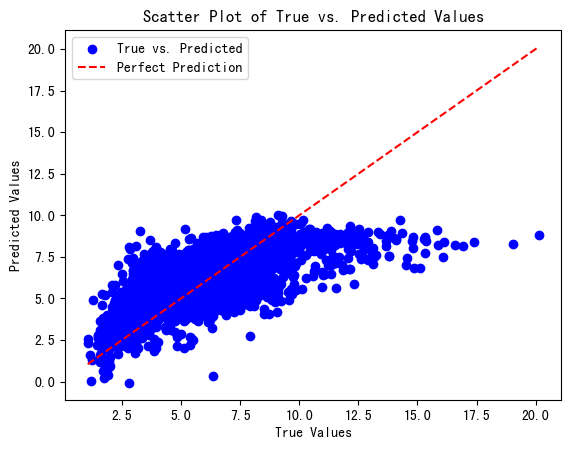

In [43]:
# 繪製散點圖
plt.scatter(y_test, y_pred, color='blue', label='True vs. Predicted')
plt.plot([min(np.array(y_test)), max(np.array(y_test))], [min(np.array(y_test)), max(np.array(y_test))], linestyle='--', color='red', label='Perfect Prediction')

# 
# 加上標題和軸標籤
plt.title('Scatter Plot of True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# 加上圖例
plt.legend()

# 顯示圖形
plt.show()

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
# scores = cross_val_score(rf,X_train,y_train.ravel(),cv=5)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print("score: ", score)
# print("cross validation score:", scores )
# print("cross validation average score:", np.average(scores) )


test_result("Random Forest", y_test, y_pred)


feature_importance = np.array(rf.feature_importances_)
rf_coef = pd.DataFrame(data=feature_importance , index=total_label, columns=['feature_importance'])
rf_coef.sort_values(by=['feature_importance'], ascending=False)

/var/folders/k7/1hsytnmx2_z97q43lcvmcmmm0000gn/T/ipykernel_1554/1440541744.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


score:  0.9589023762426904
------ model: Random Forest --------
mse:  0.28142984067889587
mae:  0.31449320240223816
rmse:  0.5304996142118257
MAPE:  0.06170456590113297


,feature_importance
motor_torque(N-m),0.55183508844078543731
blades_angle(°),0.25039814282501665632
atmospheric_pressure(Pascal),0.08248140931095439277
resistance(ohm),0.02970853459938602170
generator_temperature(°C),0.02843258866306097934
engine_temperature(°C),0.01075005311459481007
blade_breadth(m),0.00943971718184705502
wind_direction(°),0.00662772137705888460
area_temperature(°C),0.00654324432837813039
wind_speed(m/s),0.00556423847258532851


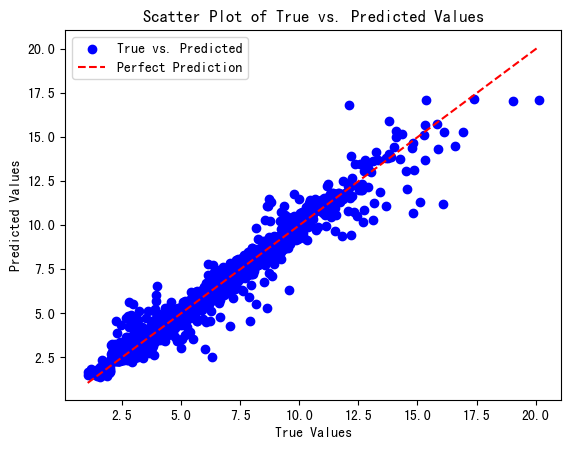

In [45]:
# 繪製散點圖
plt.scatter(y_test, y_pred, color='blue', label='True vs. Predicted')
plt.plot([min(np.array(y_test)), max(np.array(y_test))], [min(np.array(y_test)), max(np.array(y_test))], linestyle='--', color='red', label='Perfect Prediction')

# 
# 加上標題和軸標籤
plt.title('Scatter Plot of True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# 加上圖例
plt.legend()

# 顯示圖形
plt.show()

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
score = gb.score(X_test, y_test)
print("score: ", score)
test_result("GradientBoostingRegressor", y_test, y_pred)


feature_importance = np.array(gb.feature_importances_)
rank_of_coef = pd.DataFrame({'coef_name': total_label, 'feature_importance': feature_importance })
rank_of_coef.sort_values(by=['feature_importance'], ascending=False)


/Users/wangpeixuan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.9457881450328125
------ model: GradientBoostingRegressor --------
mse:  0.3712339622460389
mae:  0.4170686578119001
rmse:  0.6092897194652466
MAPE:  0.08519886161214178


,coef_name,feature_importance
6,motor_torque(N-m),0.61359951540623081101
3,blades_angle(°),0.15528394711665416406
7,generator_temperature(°C),0.12165054909503830727
12,resistance(ohm),0.03453156412240260265
8,atmospheric_pressure(Pascal),0.03002340515113225555
11,wind_direction(°),0.01264902759481368634
5,engine_temperature(°C),0.01141138275575571091
15,blade_breadth(m),0.00779293992197666648
4,gearbox_temperature(°C),0.00604767855596651232
0,wind_speed(m/s),0.00370051562937047341


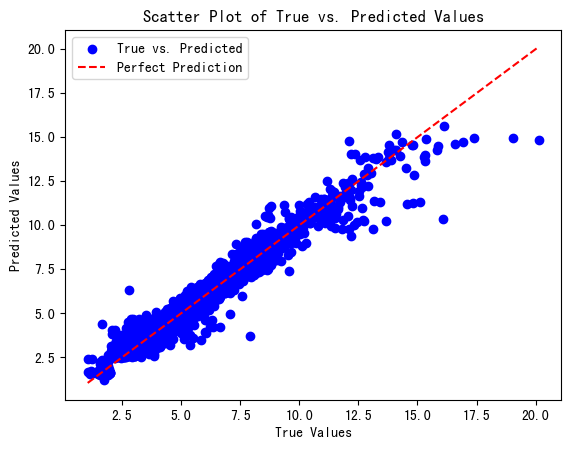

In [47]:
# 繪製散點圖
plt.scatter(y_test, y_pred, color='blue', label='True vs. Predicted')
plt.plot([min(np.array(y_test)), max(np.array(y_test))], [min(np.array(y_test)), max(np.array(y_test))], linestyle='--', color='red', label='Perfect Prediction')

# 
# 加上標題和軸標籤
plt.title('Scatter Plot of True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# 加上圖例
plt.legend()

# 顯示圖形
plt.show()

In [48]:
from sklearn.linear_model import RidgeCV
import numpy as np

ridge = RidgeCV()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
score = ridge.score(X_test, y_test)
print("score: ", score)
test_result("Ridge Regression", y_test, y_pred)


ridge_coef = pd.DataFrame(data=ridge.coef_[0] , index=total_label, columns=['coef'])
ridge_coef['abs_coef'] = abs(ridge_coef['coef'])
ridge_coef.sort_values(by=['abs_coef'], ascending=False)



score:  0.43812657360993845
------ model: Ridge Regression --------
mse:  3.8476178039986038
mae:  1.4899907719924903
rmse:  1.961534553353217
MAPE:  0.29587552588067134


,coef,abs_coef
motor_torque(N-m),2.69166510328101393767,2.69166510328101393767
generator_temperature(°C),-1.83212470463818166699,1.83212470463818166699
cloud_level_Medium,1.51590715815713372727,1.51590715815713372727
cloud_level_Low,1.42218179337912253857,1.42218179337912253857
wind_direction(°),0.64355457134030258359,0.64355457134030258359
area_temperature(°C),0.45246774579059451105,0.45246774579059451105
wind_speed(m/s),-0.19875427738417553170,0.19875427738417553170
turbine_status_A2,0.15987240386755610655,0.15987240386755610655
engine_temperature(°C),0.14090988971078000080,0.14090988971078000080
atmospheric_pressure(Pascal),0.12448254595197569272,0.12448254595197569272


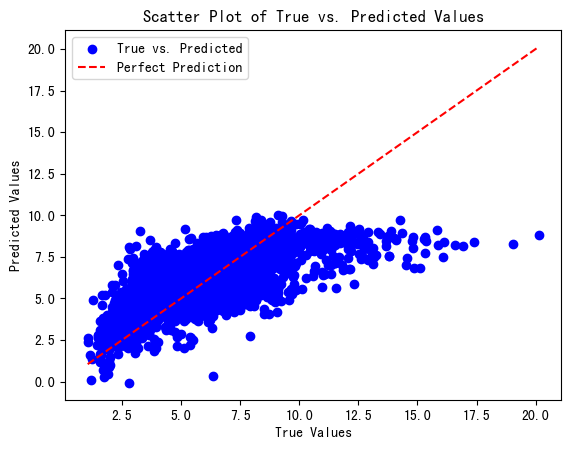

In [49]:
# 繪製散點圖
plt.scatter(y_test, y_pred, color='blue', label='True vs. Predicted')
plt.plot([min(np.array(y_test)), max(np.array(y_test))], [min(np.array(y_test)), max(np.array(y_test))], linestyle='--', color='red', label='Perfect Prediction')

# 
# 加上標題和軸標籤
plt.title('Scatter Plot of True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# 加上圖例
plt.legend()

# 顯示圖形
plt.show()

In [50]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=0, alphas=[0.1, 1, 2, 5, 7, 10]).fit(X_train, y_train)

y_pred = lasso.predict(X_test)
score = lasso.score(X_test, y_test)
print("score: ", score)
test_result("Lasso", y_test, y_pred)


lasso_coef = pd.DataFrame(data=lasso.coef_ , index=total_label, columns=['coef'])
lasso_coef['abs_coef'] = abs(lasso_coef['coef'])
lasso_coef.sort_values(by=['abs_coef'], ascending=False)

score:  0.3883035686002483
------ model: Lasso --------
mse:  4.188797635825913
mae:  1.604318095668593
rmse:  2.04665523130446
MAPE:  0.3433243196963248


/Users/wangpeixuan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,coef,abs_coef
motor_torque(N-m),1.38798972109852258860,1.38798972109852258860
wind_direction(°),0.58400600087527521076,0.58400600087527521076
generator_temperature(°C),-0.37221246734984753113,0.37221246734984753113
area_temperature(°C),0.24274716899393697367,0.24274716899393697367
wind_speed(m/s),-0.17871841409386124422,0.17871841409386124422
blades_angle(°),-0.10921159857900987478,0.10921159857900987478
atmospheric_pressure(Pascal),0.07524241038589718489,0.07524241038589718489
blade_breadth(m),0.06576930651483654799,0.06576930651483654799
engine_temperature(°C),0.04649360951430032279,0.04649360951430032279
atmospheric_temperature(°C),-0.01705469261799455807,0.01705469261799455807


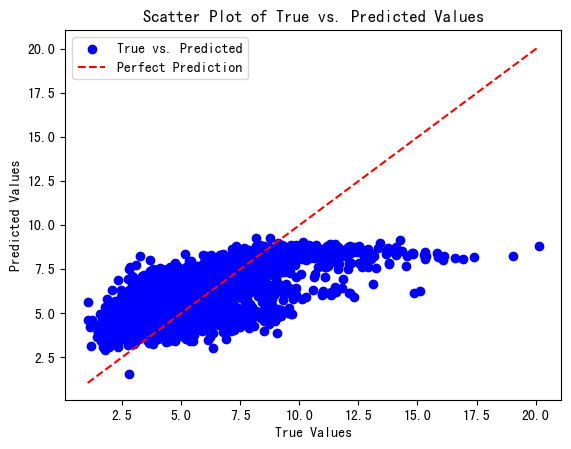

In [51]:
# 繪製散點圖
plt.scatter(y_test, y_pred, color='blue', label='True vs. Predicted')
plt.plot([min(np.array(y_test)), max(np.array(y_test))], [min(np.array(y_test)), max(np.array(y_test))], linestyle='--', color='red', label='Perfect Prediction')

# 
# 加上標題和軸標籤
plt.title('Scatter Plot of True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# 加上圖例
plt.legend()

# 顯示圖形
plt.show()

In [52]:
lasso.alpha_

0.1

In [53]:

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
score = neigh.score(X_test, y_test)
print("score: ", score)
test_result("KNN", y_test, y_pred)

score:  0.5752820764049553
------ model: KNN --------
mse:  2.9083992368187883
mae:  1.2755634262235755
rmse:  1.7054029543831535
MAPE:  0.25694130334076165


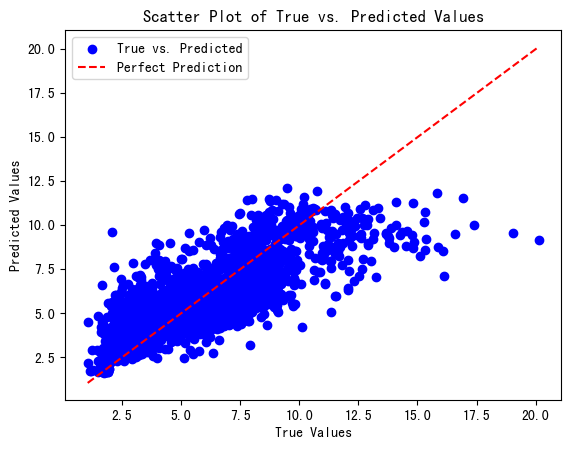

In [54]:
# 繪製散點圖
plt.scatter(y_test, y_pred, color='blue', label='True vs. Predicted')
plt.plot([min(np.array(y_test)), max(np.array(y_test))], [min(np.array(y_test)), max(np.array(y_test))], linestyle='--', color='red', label='Perfect Prediction')

# 
# 加上標題和軸標籤
plt.title('Scatter Plot of True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# 加上圖例
plt.legend()

# 顯示圖形
plt.show()

隨意整理模型可能覺得的重要特徵 [#link](https://docs.google.com/spreadsheets/d/1cuSEipUQ6vcJh4IeE12Y63wfuIzoy1t9G3WC1h9mCAg/edit?usp=sharing)

In [ ]:
# TODO 刪掉共線性欄位！